# **1 - Abstracto**

El objetivo de análisis del proyecto es encontrar la localización ideal para la construcción o compra de un inmueble, según la localidad, barrio, tipo de alquiler, dias disponibles al año y precio. Para ello se usará como base de datos un dataset que contiene datos de interes, con columnas directamente relacionadas a las variables deseadas para el análisis. El mismo debe proporcionar resultados que permitan determinar de manera objetiva que tipos de alojamientos son los mas ofertados en el mercado segun cada barrio, lo que permitirá la toma de desición de optar por la inversión adecuada para la unidad de negocio de alquileres turisticos.  Esta investigación esta dirigida al cliente inmobiliario que desea emprender esta nueva unidad de negocio en la ciudad de Nueva York.



## **Contexto empresarial y objetivo:**

El equipo de consultoría de una empresa analista de datos especializada en el área inmobiliaria, recibe una cierta cantidad de datos provista por el cliente con el interés de invertir en el sector inmobiliario en la ciudad de Nueva York. La necesidad principal es poder determinar que tipo de inversion y en que localidad sería mejor invertir para el cliente, en pro de generar la mejor desicion objetiva se plantea analizar los insights basado en la base provista y posteirormente crear un modelo de predicción según sus variables mas importantes relacionadas a los precios y costos como: construcción, venta y alquiler de inmuebles.





# **2 - Hipótesis / Preguntas**:

En pro de encontrar la localización ideal en base a las variables mencionadas, se requierene encontrar cuales de ellas tienen una relacion con el precio, como por ejemplo: ¿existe alguna relación del precio en función a los dias disponibles al año?, ¿hay alguna relación del precio según la localidad?, ¿Cuales localidades tienen mayor oferta?, ¿Cuales son los tipos de alquileres con mayor variedad de precios?.

# **3 - Análisis Exploratorio de Datos (EDA)**:

Para encontrar respuestas a estas interrogantes de la hipótesis, se procede a calcular las siguientes variables con sus respectivos gráficos y procedimientos:

1 - Carga de librerías y dataset

2 - Reemplazo de datos NaN con valores promedios relacionados a cada campo

3 - Promedio de precios por tipo de alquiler : de manera generalizada conocer los promedios de precios de los alquileres indistintamente de su tipo y localidad.

4 - Porcentajes de oferta segun la localidad: Se analiza cuales localidades tienen mayor oferta de alquileres de manera generalizada.

5 - Promedio de precios por tipo de alquiler en cada localidad: Una vez obteniudoos los promedios generalizados se obtienen mas detalle encontrando los precios por tipo de alquiler en cvada localidad, de tal modo se obtiene que localidad tiene mayor variedad de tipo de alquiler.

6 - Media de dias disponibles de cada alquiler por localidad: Con esta metrica se puede determinar cuales son los rangos intercuartilicos de los dias disponibles segun el tipo de alquiler en cada uno de las localidades.

7 - Promedio de precios segun el tipo de alquiler mas ofertado: Ya conociendo cual es el tipo de alquiler con mayor oferta y disponibilidad de dias se obtienen los promedios.

8 - Relacion del precio en funcion a los dias disponibles segun el tipo de alquiler: Se busca si hay una relacion significativa entre el precio en base a los dias disponibles de cada tipo de alquiler.

9 - Relacion de precios segun el tipo de alquiler en cada localidad: con el objetivo de saber que localidad tiene mayor variedad de precios por tipo de alquiler con mas oferta.

10 - Precios por tipo de alquiler en los barrios de las localidades con mayor oferta: ofrece un detalle de los precios por cada barrio asociado a la localdiad con mayor oferta.


In [1]:
#Importacion de librerias
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
datos =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYC-Airbnb-2023-data.csv',delimiter=',',header=0)
d1 = datos
print(d1)

                                                     id  \
0                                                  2595   
1                                                  5121   
2                                                  5203   
3                                                  5178   
4     5136,"Large Sunny Brooklyn Duplex, Patio + Gar...   
...                                                 ...   
2451                                            3677436   
2452                                            3749971   
2453                                            3677769   
2454                                            3752035   
2455                                            3511778   

                                    name     host_id  host_name  \
0                  Skylit Midtown Castle      2845.0   Jennifer   
1                        BlissArtsSpace!      7356.0      Garon   
2     Cozy Clean Guest Room - Family Apt      7490.0  MaryEllen   
3       Large Furnished

In [4]:
#Se rellenan los datos "NaN" sustituyendolos por el promedio de la columna
d1.fillna(d1.mean(), inplace=True)
print(d1)


                                                     id  \
0                                                  2595   
1                                                  5121   
2                                                  5203   
3                                                  5178   
4     5136,"Large Sunny Brooklyn Duplex, Patio + Gar...   
...                                                 ...   
2451                                            3677436   
2452                                            3749971   
2453                                            3677769   
2454                                            3752035   
2455                                            3511778   

                                    name       host_id  host_name  \
0                  Skylit Midtown Castle  2.845000e+03   Jennifer   
1                        BlissArtsSpace!  7.356000e+03      Garon   
2     Cozy Clean Guest Room - Family Apt  7.490000e+03  MaryEllen   
3       Large F

<ipython-input-4-f4fa8daa1219>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d1.fillna(d1.mean(), inplace=True)


room_type
Entire home/apt    240.155472
Hotel room         219.000000
Private room       112.075949
Shared room        188.600000
Name: price, dtype: float64


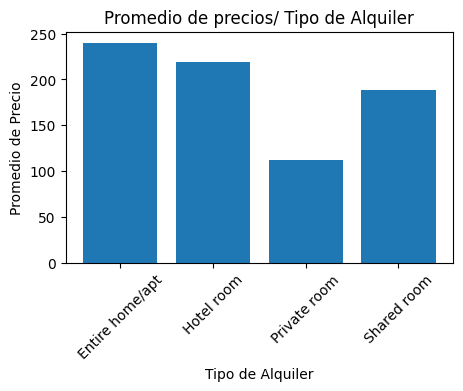

In [5]:
#3 - Promedio de precios por tipo de alquiler
room_price = d1.groupby('room_type')['price'].mean()
x = room_price.index
y = room_price.values
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(x, y, label='Promedio por tipo de Alquiler')


plt.title('Promedio de precios/ Tipo de Alquiler')
plt.xlabel('Tipo de Alquiler')
plt.ylabel('Promedio de Precio')
plt.xticks(rotation=45)

print(room_price)

***Promedio de precios por tipo de alquiler :***

Entire home/apt:    240.15

Hotel room:         219.00

Private room:       112.07

Shared room:       188.60


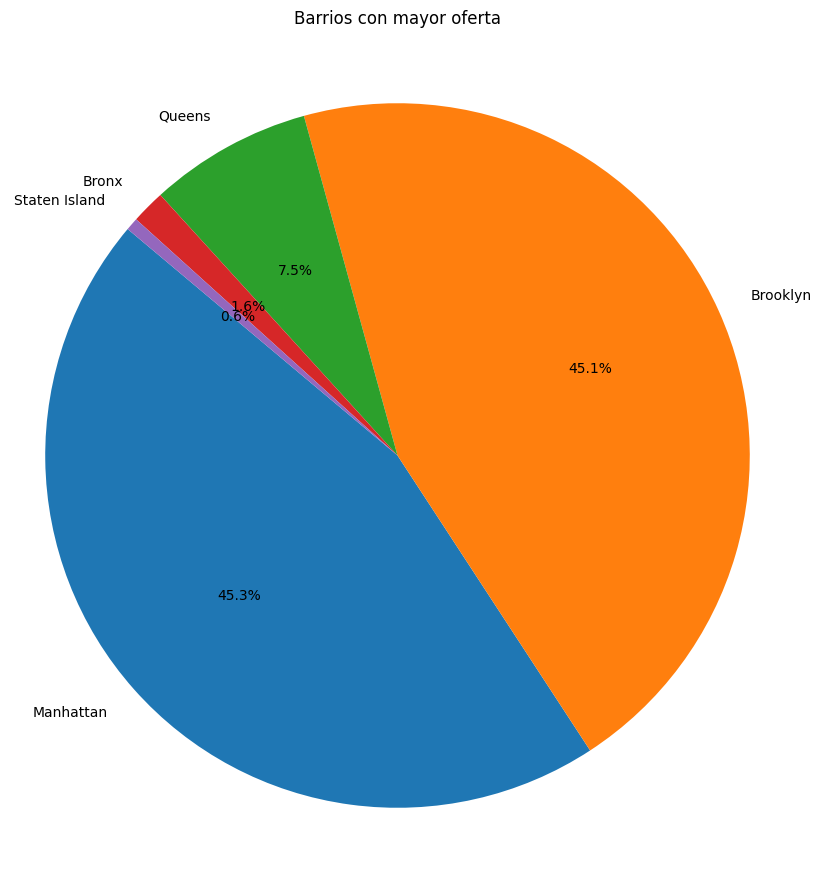

Manhattan        45.317807
Brooklyn         45.075206
Queens            7.472101
Bronx             1.552644
Staten Island     0.582242
Name: neighbourhood_group, dtype: float64


In [14]:
#4 - Porcentaje de localidades con mas oferta
# Conteo de barrios totales del DataFrame d1
dist_barrios = d1['neighbourhood_group'].value_counts()

#Porcentajes
avg = d1['neighbourhood_group'].value_counts(normalize=True) * 100

# Variables
x = dist_barrios.index
y = dist_barrios.values

plt.figure(figsize=(10, 11))
plt.pie(dist_barrios, labels=x, autopct='%1.1f%%', startangle=140)


plt.title('Barrios con mayor oferta')


plt.axis('equal')  # Piechart circulo
plt.show()
print(avg)

***Porcentajes por Localidad***:

Manhattan        45.31 %

Brooklyn         45.075 %

Queens            7.47 %

Bronx             1.55 %

Staten Island     0.58 %

Podemos notar que tanto en Manhattan como Brooklyn tienen la mayor cantidad de oferta de alquileres, indiferentemente de su tipo.

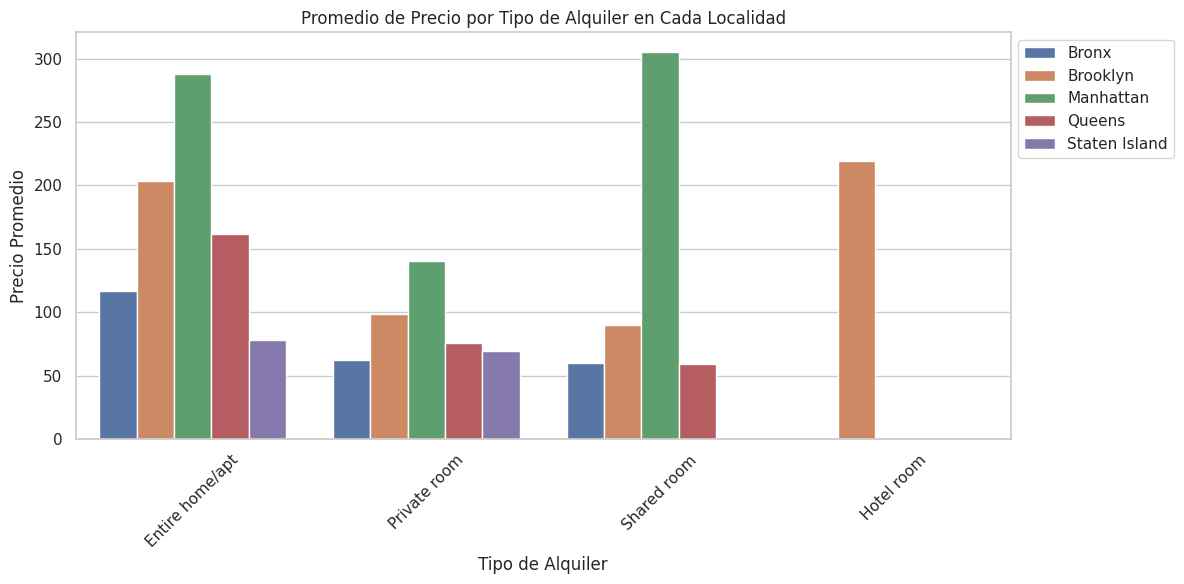

In [15]:
#5 - Promedio de precios por tipo de alquiler en cada localidad
prom_barrios = d1.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="room_type", y="price", hue="neighbourhood_group", data=prom_barrios)


plt.title("Promedio de Precio por Tipo de Alquiler en Cada Localidad")
plt.xlabel("Tipo de Alquiler")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()

***Promedio de precios por tipo de alquiler en cada localidad***: Viendo los resultados podemos ver que el tipo de alquiler de habitación de hotel solo se encuentra en una sola localidad, mientras que el alquiler entero y habitación privada tiene mayor oferta en todas las localidades con promedios distintos en cada una de ellas.


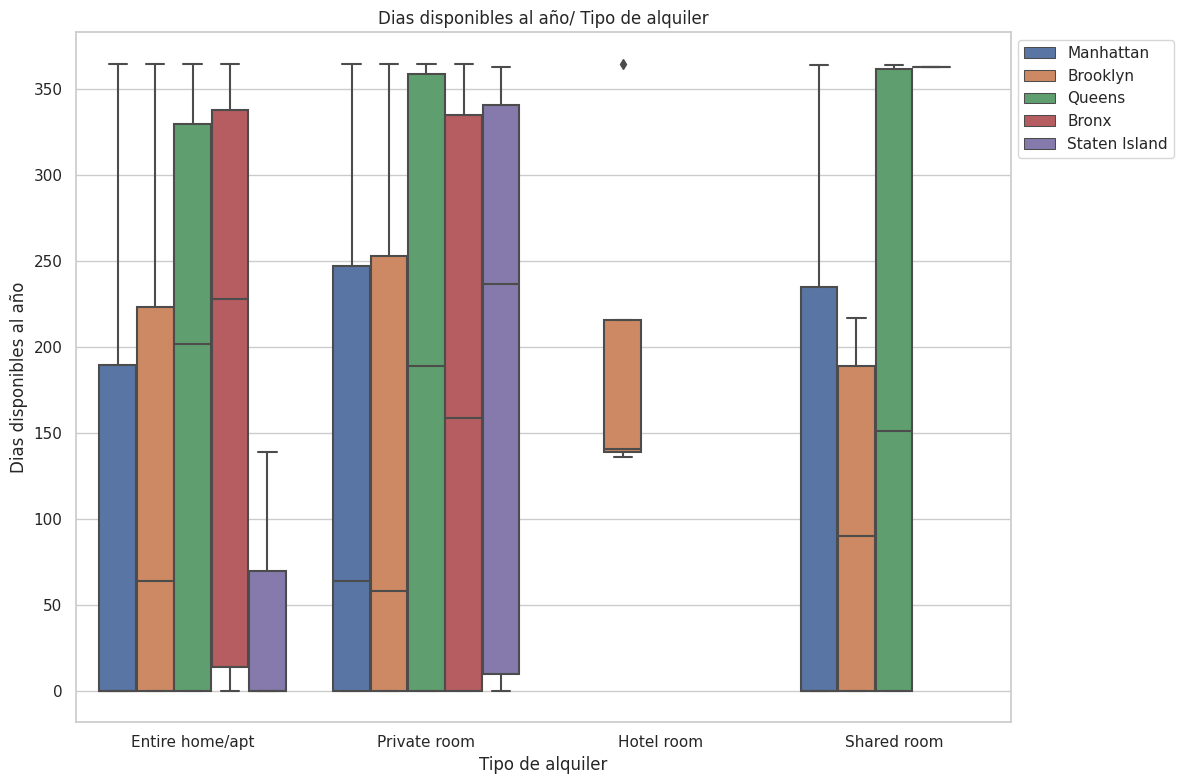

In [16]:
#6 -Media de dias  disponibles de cada alquiler por localidad
plt.figure(figsize=(12,8))

#Boxplot
sns.boxplot(x=d1.room_type, y= d1.availability_365, hue=d1.neighbourhood_group)

#Contextualizamos el gráfico
plt.title('Dias disponibles al año/ Tipo de alquiler')
plt.xlabel('Tipo de alquiler')
plt.ylabel('Dias disponibles al año')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()

***Media de días disponibles al año por tipo de alquiler en cada localidad:***
Es notable como hay mayor rango intercuartilico de alquileres con mas dias disponibles en habitaciones privadas que en el resto de los alquileres, incluyendo todas las localidades. En segundo lugar se encuentra el alquiler entero con rangos un poco mas cortos de días disponibles en relacion a las habitaciones privadas.


<ipython-input-17-4f7546534968>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="room_type", y="price", data=most_rent, ci=None)


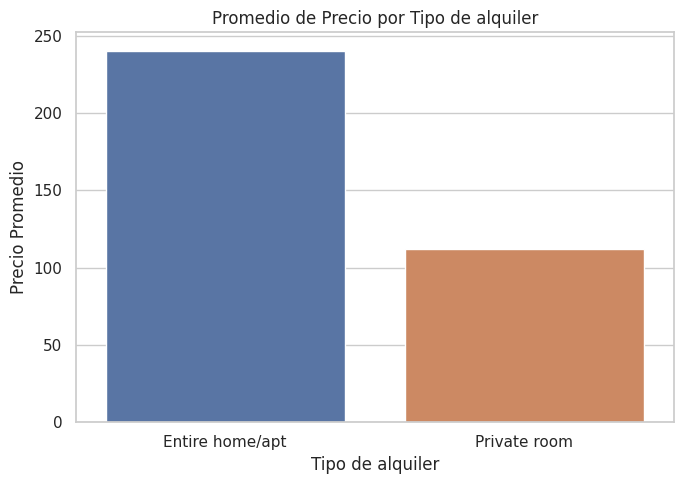

In [17]:
#7 - Promedio de precios segun el tipo de alquiler mas ofertado.
most_rent = d1[d1['room_type'].isin(['Entire home/apt', 'Private room'])]

sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.barplot(x="room_type", y="price", data=most_rent, ci=None)
plt.title("Promedio de Precio por Tipo de alquiler")
plt.xlabel("Tipo de alquiler")
plt.ylabel("Precio Promedio")

plt.tight_layout()
plt.show()

***Promedio de precios segun el tipo de alquiler mas ofertado:*** Ya sabiendo que los tipos de alquiler con mas demanda y disponibilidad en todos las localidades, son habitaciones privadas y alojamiento completo, analizamos los promedios generales de precios:

Entire home/apt:    240.15 U$D

Private room:       112.07 U$D

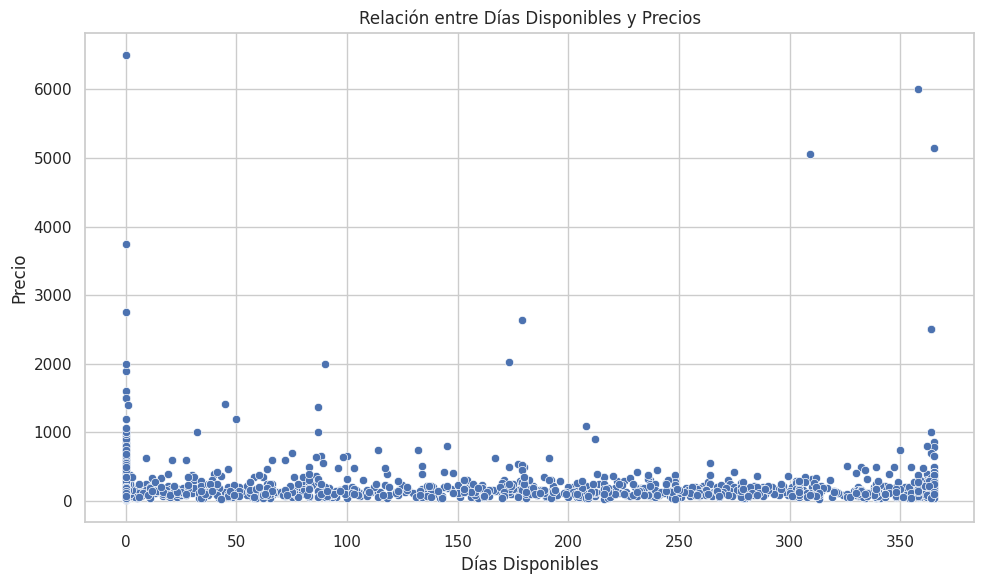

In [18]:
#8 - Relacion del precio en funcion de los dias disponibles en tipos de alquiler: Alojamiento entero y habitacion privada


plt.figure(figsize=(10, 6))
sns.scatterplot(x="availability_365", y="price", data=most_rent)
sns.set(style="whitegrid")

plt.title("Relación entre Días Disponibles y Precios")
plt.xlabel("Días Disponibles")
plt.ylabel("Precio")

plt.tight_layout()
plt.show()

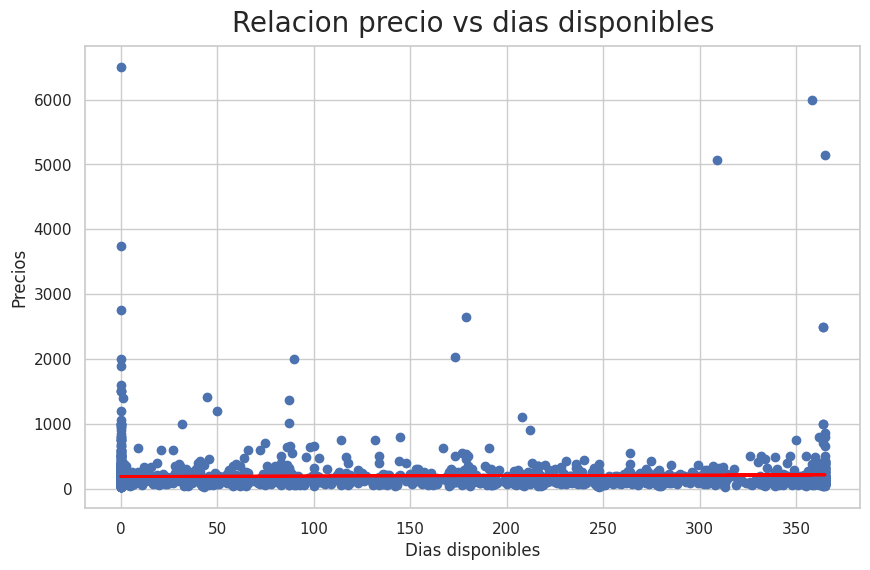

In [19]:
# Linea de tendencia de la relacion de precios vs dias disponibles

dias = most_rent['availability_365']
precio = most_rent['price']

# Calculo de coeficientes
coefficients = np.polyfit(dias, precio, 1)
b, a = coefficients

#Línea de tendencia
trend_line = b * dias + a

plt.figure(figsize=(10, 6))
plt.scatter(dias, precio)
plt.plot(dias, trend_line, color='red', linewidth=2, label='Línea de Tendencia')

plt.title("Relacion precio vs dias disponibles", fontsize=20, verticalalignment='bottom');
plt.xlabel("Dias disponibles");
plt.ylabel("Precios");

***Relacion del precio en funcion a los dias disponibles segun el tipo de alquiler:*** No se observa una relacion del incremento de precios en base a los dias disponibles, por lo que no varía segun esta disponibilidad, su relacion se mantiene en rango a pesar de los dias de cada alquiler.


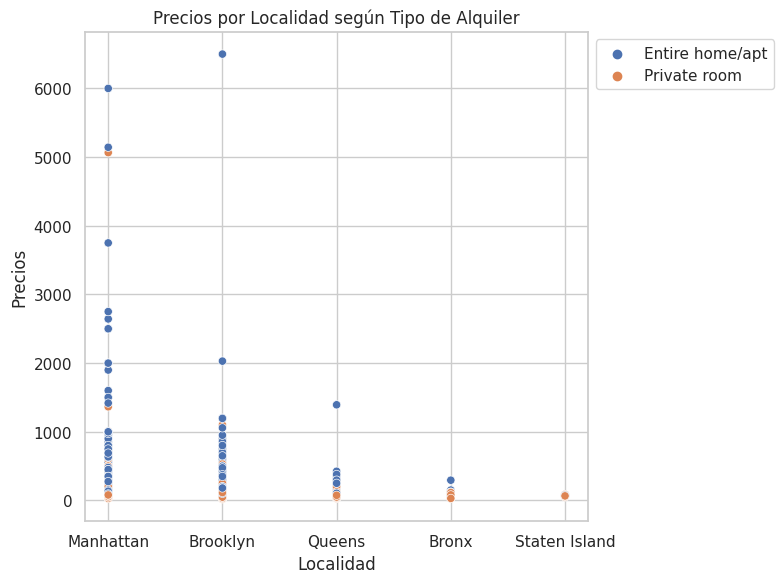

In [20]:
#9 - Relacion de precios segun localidad (Alojamiento entero, Habitacion privada)
plt.figure(figsize=(8, 6))

sns.scatterplot(data=most_rent, x='neighbourhood_group', y='price', hue = 'room_type')

plt.xlabel('Localidad')
plt.ylabel('Precios')
plt.title('Precios por Localidad según Tipo de Alquiler')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()


***Relación de precios segun el tipo de alquiler en cada localidad:*** Podemos observar como las localidades de Manhattan y Brooklyn tienen mayor variedad de precios segun los tipos de alquiler, los cuales estan directamente relacionados a las mayor oferta de alquileres de tipo privado y alojamiento entero, con precios que superan los 1000 U$D en ambas localidades.


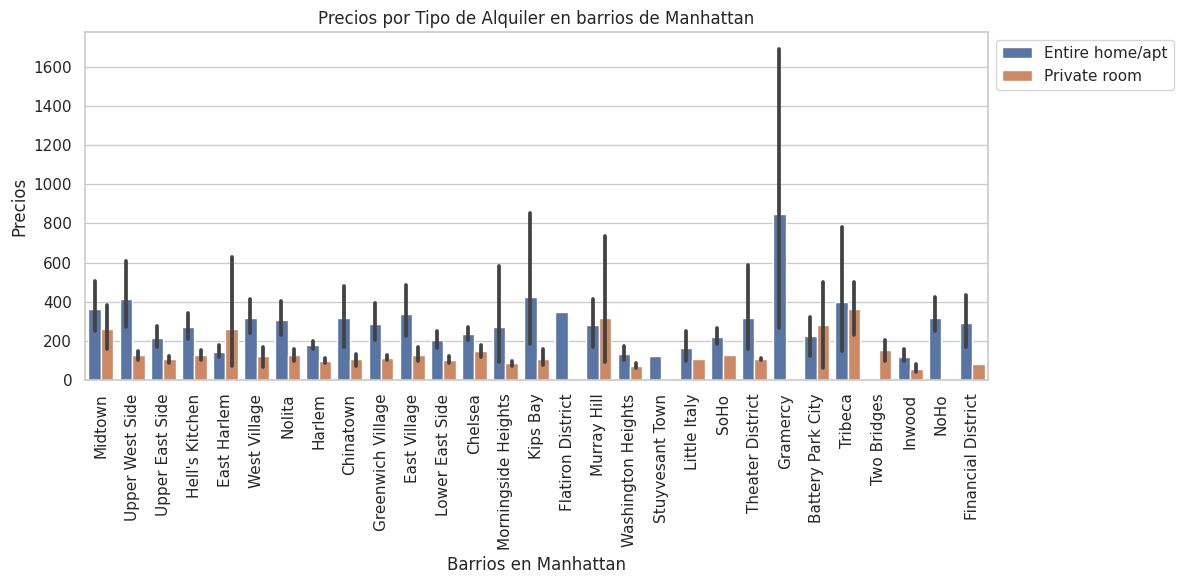

Harlem                 157
Upper West Side        103
East Village            97
Upper East Side         82
Chelsea                 55
Hell's Kitchen          54
East Harlem             50
Lower East Side         49
West Village            46
Midtown                 40
Washington Heights      32
Greenwich Village       24
Kips Bay                16
Nolita                  15
Chinatown               13
Murray Hill             13
Morningside Heights     12
Gramercy                12
SoHo                    10
Tribeca                  9
Theater District         8
Inwood                   6
Financial District       6
Little Italy             4
Battery Park City        4
NoHo                     3
Two Bridges              2
Flatiron District        1
Stuyvesant Town          1
Name: neighbourhood, dtype: int64


In [21]:
#10 - Precios por tipo de alquiler en los barrios de las localidades con mayor oferta: MANHATTAN

most_rent_m = most_rent[most_rent['neighbourhood_group'].isin(['Manhattan'])]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="neighbourhood", y="price", hue="room_type", data=most_rent_m)
most_rent_mi = most_rent_m['neighbourhood'].value_counts()


plt.xlabel('Barrios en Manhattan')
plt.ylabel('Precios')
plt.title('Precios por Tipo de Alquiler en barrios de Manhattan')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()
print(most_rent_mi)

***Precios por tipo de alquiler en los barrios de Manhattan:***
Dentro de la localidad de Manhattan los barrios con mayor oferta de alquiler por encima de 50 ofertas son:

Harlem:                 157

Upper West Side:        103

East Village:            97

Upper East Side:         82

Chelsea:                 55

Hell's Kitchen:          54

East Harlem:             50

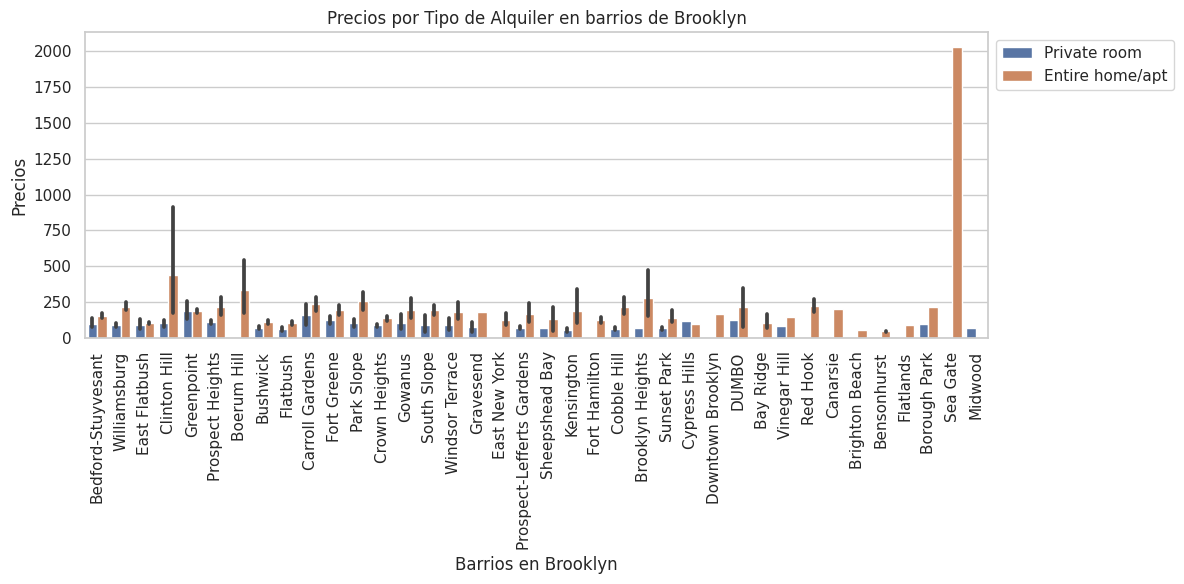

Williamsburg                 185
Bedford-Stuyvesant           155
Greenpoint                    80
Crown Heights                 68
Bushwick                      50
Fort Greene                   46
Park Slope                    45
Clinton Hill                  42
Flatbush                      32
Prospect-Lefferts Gardens     28
Carroll Gardens               26
Prospect Heights              22
South Slope                   17
Sunset Park                   15
Windsor Terrace               14
Gowanus                       12
Boerum Hill                   11
Brooklyn Heights               9
East Flatbush                  9
Kensington                     9
Cobble Hill                    7
Sheepshead Bay                 5
East New York                  4
Red Hook                       4
Gravesend                      3
DUMBO                          3
Bay Ridge                      3
Fort Hamilton                  2
Cypress Hills                  2
Vinegar Hill                   2
Bensonhurs

In [22]:
#Relacion de precio por barrio primero en Brooklyn

most_rent_b = most_rent[most_rent['neighbourhood_group'].isin(['Brooklyn'])]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="neighbourhood", y="price", hue="room_type", data=most_rent_b)
most_rent_bi = most_rent_b['neighbourhood'].value_counts()

plt.xlabel('Barrios en Brooklyn')
plt.ylabel('Precios')
plt.title('Precios por Tipo de Alquiler en barrios de Brooklyn')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()
print(most_rent_bi)

***Precios por tipo de alquiler en los barrios de Brooklyn:***
Dentro de la localidad de Manhattan los barrios con mayor oferta de alquiler igual o por encima de 50 ofertas son:

Williamsburg:                185

Bedford-Stuyvesant:           155

Greenpoint:                    80

Crown Heights:                 68

Bushwick:                      50

# **4 - Recomendaciones**

Dados los insights obtenidos en las visualizaciones,  es posible dar algunas recomendaciones que permitirán tomar la desición del tipo de inversión a optar. En primer lugar:

1 - Las localidades con mayor oferta corresponden a Manhattan y Brooklyn. Donde los barrios con mayor oferta corresponden a:

Manhattan: Harlem, Upper West Side, East Village

Brooklyn: Williamsburg, Bedford-Stuyvesant, Greenpoint.


2- Los alquileres mas ofertados son de tipo : Alojamiento entero y habitación privada. Esto abre la posibilidad de coprar o construir alojamientos enteros que pueden ser segmentados en habitaciones privadas, o multiples inmuebles que pueden ser ofertados para alojamientos enteros.


3 -  Por otro lado, no se encontró relacion entre los dias disponibles al año y su variación en precio, lo que significa que no hay alquileres elevados en función de su disponibilidad. Dando la posibilidad de generar ofertas en relacion a la calidad y locación del alquiler.

## **SELECCION DE FEATURES / REGRESION / HIPOTESIS NULA / ANALISIS DE METRICAS / CONCLUSIONES**

In [23]:

from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.formula.api as sm

import os

In [24]:
print(most_rent)

           id                                name     host_id  host_name  \
0        2595               Skylit Midtown Castle      2845.0   Jennifer   
1        5121                     BlissArtsSpace!      7356.0      Garon   
2        5203  Cozy Clean Guest Room - Family Apt      7490.0  MaryEllen   
3        5178    Large Furnished Room Near B'way　      8967.0   Shunichi   
6        5586  Rooftop Deck/City Views. Great Apt      8526.0      Susan   
...       ...                                 ...         ...        ...   
2451  3677436   Spacious 1BR in heart of Brooklyn  18678912.0      Shena   
2452  3749971  Williamsburg Apt. w/ private patio  10094431.0      Sofia   
2453  3677769       Beautiful Large Sunny Bedroom  18681479.0     Pamela   
2454  3752035   New & Modern 2 BR Brownstone Apt.  14961638.0      Elito   
2455  3511778    10th St / W Village  Junior Loft  17681072.0     Brooks   

     neighbourhood_group       neighbourhood  latitude  longitude  \
0              Man

In [25]:
# Ajuste de Data Frame para valores numericos
d2 = most_rent
# Codigo numerico de los barrios
codigo_barrio_dic = {
    'Manhattan': 100,
    'Brooklyn': 200,
    'Queens': 300,
    'Bronx': 400}

room_type_dic = {
    'Entire home/apt': 1100,
    'Private room': 1200,
    'Shared room': 1300,
    'Hotel room': 1400}
# asignacion de codigos en una nueva columna
d2['codigo_barrio']= most_rent['neighbourhood_group'].map(codigo_barrio_dic)
d2['codigo_room']= most_rent['room_type'].map(room_type_dic)
d2['codigo_barrio'] = pd.to_numeric(d2['codigo_barrio'], downcast='integer', errors='coerce')

# completa los campos categoricos con la moda
nan_neighbourhood_group = d2['neighbourhood_group'].mode()[0]
nan_neighbourhood = d2['neighbourhood'].mode()[0]
d2['neighbourhood_group'].fillna(nan_neighbourhood_group, inplace=True)
d2['neighbourhood'].fillna(nan_neighbourhood, inplace=True)
d2['license'].fillna('0', inplace=True)

#elimina los campos vacios
d2 = d2.dropna()


print(d2)

           id                                name     host_id  host_name  \
0        2595               Skylit Midtown Castle      2845.0   Jennifer   
1        5121                     BlissArtsSpace!      7356.0      Garon   
2        5203  Cozy Clean Guest Room - Family Apt      7490.0  MaryEllen   
3        5178    Large Furnished Room Near B'way　      8967.0   Shunichi   
6        5586  Rooftop Deck/City Views. Great Apt      8526.0      Susan   
...       ...                                 ...         ...        ...   
2451  3677436   Spacious 1BR in heart of Brooklyn  18678912.0      Shena   
2452  3749971  Williamsburg Apt. w/ private patio  10094431.0      Sofia   
2453  3677769       Beautiful Large Sunny Bedroom  18681479.0     Pamela   
2454  3752035   New & Modern 2 BR Brownstone Apt.  14961638.0      Elito   
2455  3511778    10th St / W Village  Junior Loft  17681072.0     Brooks   

     neighbourhood_group       neighbourhood  latitude  longitude  \
0              Man

<ipython-input-25-8a1cfa82add5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['codigo_barrio']= most_rent['neighbourhood_group'].map(codigo_barrio_dic)
<ipython-input-25-8a1cfa82add5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['codigo_room']= most_rent['room_type'].map(room_type_dic)
<ipython-input-25-8a1cfa82add5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [26]:
# Ajuste de DataFrame para la seleccion de features

d2['price'] = most_rent.price
features_drop = ["id","name","host_name","neighbourhood_group","neighbourhood","room_type","last_review"]
x = d2.drop(columns=features_drop)       # Matriz de características
y = d2['price']

<ipython-input-26-ab1fe6cbaadc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['price'] = most_rent.price


In [27]:
x

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,codigo_barrio,codigo_room
0,2845.0,40.75356,-73.98559,150.0,30.0,49.0,0.30,3.0,314.0,1.0,0,100.0,1100
1,7356.0,40.68535,-73.95512,60.0,30.0,50.0,0.30,2.0,365.0,0.0,0,200.0,1200
2,7490.0,40.80380,-73.96751,75.0,2.0,118.0,0.72,1.0,0.0,0.0,0,100.0,1200
3,8967.0,40.76457,-73.98317,68.0,2.0,575.0,3.41,1.0,106.0,52.0,0,100.0,1200
6,8526.0,40.76076,-73.96156,295.0,4.0,45.0,0.27,1.0,1.0,4.0,0,100.0,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,18678912.0,40.63387,-73.96224,103.0,2.0,9.0,0.09,1.0,63.0,1.0,0,200.0,1100
2452,10094431.0,40.71649,-73.96180,115.0,30.0,95.0,0.91,1.0,0.0,0.0,0,200.0,1200
2453,18681479.0,40.74329,-73.92317,75.0,30.0,118.0,1.14,1.0,0.0,0.0,0,300.0,1200
2454,14961638.0,40.68599,-73.95538,181.0,3.0,110.0,1.11,1.0,153.0,22.0,0,200.0,1100


In [28]:
y

0       150.0
1        60.0
2        75.0
3        68.0
6       295.0
        ...  
2451    103.0
2452    115.0
2453     75.0
2454    181.0
2455    275.0
Name: price, Length: 1841, dtype: float64

In [29]:
# Método de Bi-directional Elimination (Stepwise)
sfs_stepwise = SFS(LinearRegression(),
                   k_features=6,
                   forward=True,
                   floating=True,
                   scoring='r2',
                   cv=5)
sfs_stepwise.fit(x, y)
selected_features_stepwise = sfs_stepwise.k_feature_names_
print("Bi-directional Elimination (Stepwise) - Características seleccionadas:", selected_features_stepwise)

Bi-directional Elimination (Stepwise) - Características seleccionadas: ('host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews')


In [30]:
#LIBRERIAS
! pip install chart_studio
import chart_studio.plotly     as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.6 MB/s eta 0:00:00


In [31]:
#CONFIRMACION DE HIPOTESIS NULA
#Regresion lineal - Para confirmar la hipotesis nula de la realcion entre los dias disponibles al año y el precio
modelo_lineal = 'price~availability_365'
lm1   = sm.ols(formula = modelo_lineal, data = d2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     10.76
Date:                Fri, 08 Sep 2023   Prob (F-statistic):            0.00106
Time:                        18:25:34   Log-Likelihood:                -12788.
No. Observations:                1841   AIC:                         2.558e+04
Df Residuals:                    1839   BIC:                         2.559e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          159.9313      7.980  

**Resultado:** Viendo que F< Significancia de F. No es posible rechazar la hipotesis nula, la cual corresponde a que no hay variacion de precio en funcion a los dias disponibles al año de las ofertas.


# **Regresion lineal con seleccion de feature**

In [32]:
# Features seleccionados:
d2_x = d2[['host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews']]
# Division de datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(d2_x, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()
model.fit(x_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(x_test)
print(d2_x)

         host_id  latitude  longitude  price  minimum_nights  \
0         2845.0  40.75356  -73.98559  150.0            30.0   
1         7356.0  40.68535  -73.95512   60.0            30.0   
2         7490.0  40.80380  -73.96751   75.0             2.0   
3         8967.0  40.76457  -73.98317   68.0             2.0   
6         8526.0  40.76076  -73.96156  295.0             4.0   
...          ...       ...        ...    ...             ...   
2451  18678912.0  40.63387  -73.96224  103.0             2.0   
2452  10094431.0  40.71649  -73.96180  115.0            30.0   
2453  18681479.0  40.74329  -73.92317   75.0            30.0   
2454  14961638.0  40.68599  -73.95538  181.0             3.0   
2455  17681072.0  40.73223  -73.99265  275.0            60.0   

      number_of_reviews  
0                  49.0  
1                  50.0  
2                 118.0  
3                 575.0  
6                  45.0  
...                 ...  
2451                9.0  
2452               95.0

# **Metricas de regresion**

In [33]:
#MAE
mse = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 7.812682533434914e-10


In [34]:
#mse
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 3.049355065210942e-18


El MAE y un MSE bajo indica que las predicciones del modelo están más cerca de los valores reales, lo que es deseable.

In [35]:
#R2
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R^2: {r2}")

R^2: 1.0


 R2 cercano a 1 indicando que el modelo explica una gran parte de la variabilidad en los datos y se ajusta bien a ellos.

# **CONCLUSIONES:**

A pesar de los buenos valores de las métricas de la regresión lineal en base a los features seleccionados, estos no hacen referencia directamente a caracteristicas que condiciones el precio directamente proporcional a los alquileres. sin embargo, los campos de Log y Lat, pueden interpretarse con mayor detalle en una visualizacions GIS para relacionar los precios en funcion de estas coordenadas, lo que validaria la regresión con la seleccion de estos features.